In [1]:
"""
RT and HT distributions for the given sessions
"""

# Root path and directory
import sys
import os

ROOT_PATH = "E:/ADS/python/ams/isaccade"
os.chdir(ROOT_PATH)
sys.path.insert(0, os.path.abspath('.'))

import numpy as np
import pandas as pd
from utils.funcs.readMatfiles import *

# Figure for histograms
import matplotlib.pyplot as plt
from utils.plots.pHIST import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
# Required files
# Loading Dataset
ROOT_PATH = "E:/ADS/python/ams/isaccade"
get_data  = "data"
task      = "MG"
recordings = "fef"
analysis   = "population"
subject    = "m1"

path = "/".join([ROOT_PATH,get_data,task,recordings,analysis,subject])
print(path)

E:/ADS/python/ams/isaccade/data/MG/fef/population/m1


In [3]:
fname        = 'nFeF.mat'
fpath = path+'/'+fname
data_dict1 = load_data(fpath)

Opening mat file v7.0 Path: E:/ADS/python/ams/isaccade/data/MG/fef/population/m1/nFeF.mat


,Variables,Type,Fields,Dim
0,AMP,ndarray,float64,"(302, 115)"
1,DIR,ndarray,float64,"(302, 115)"
2,DUR,ndarray,float64,"(302, 115)"
3,HT,ndarray,float64,"(302, 115)"
4,NTR,ndarray,float64,"(115, 1)"
5,POS,ndarray,float64,"(302, 115)"
6,RT,ndarray,float64,"(302, 115)"
7,Raw,dict,"[value, shape]",2
8,SPEED,ndarray,float64,"(302, 115)"
9,SPtime,dict,"[value, shape]",2


In [4]:
fname = 'type/Nrn_cell_mf.mat'
fpath = path+'/'+fname
data_dict2 = load_data(fpath)

Opening mat file v5.0 Path: E:/ADS/python/ams/isaccade/data/MG/fef/population/m1/type/Nrn_cell_mf.mat


,Variables,Type,Fields,Dim
0,EPOCHS,ndarray,int16,"(5, 2)"
1,time,ndarray,int16,"(1, 1281)"
2,BASAL,ndarray,float64,"(115, 3)"
3,VIS,ndarray,float64,"(115, 3)"
4,PREP,ndarray,float64,"(115, 3)"
5,SACC,ndarray,float64,"(115, 3)"
6,MOD_HT,ndarray,float64,"(115, 3)"
7,MOD_MO,ndarray,float64,"(115, 3)"
8,tBASAL,ndarray,object,"(2, 1)"
9,tVIS,ndarray,object,"(2, 1)"


In [5]:
# Extracting variables from dictionary
# From dataset1
var = 'SPtime'
data = big_Array(data_dict1[var])
print(data.shape)
SPtimeTarget = data[:,0]
SPtimeGo     = data[:,1]
SPtimeMo     = data[:,2]

(115, 3)


In [6]:
# From dataset2
stime = np.transpose(data_dict2['time'])
Mf_activity = data_dict2['Mf_activity']

N = Mf_activity.shape[0]                     # No. of neurons
eventtarget, eventgo, eventmo = [0, 1, 2]    # Events

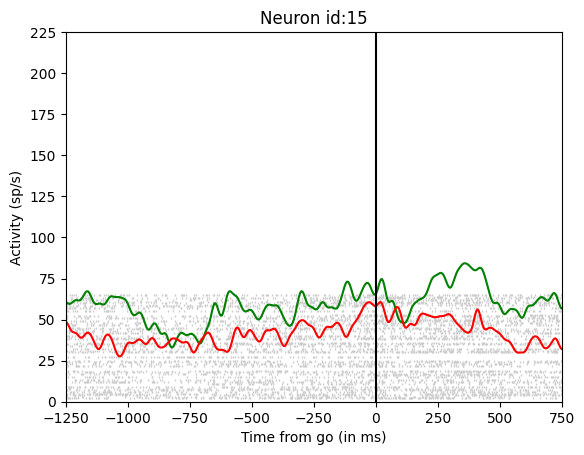

In [9]:
event = eventmo
spike_timings = SPtimeMo
iRF, oRF = [0, 1]

neuron_id = 14

raster = spike_timings[neuron_id]
Mf    = Mf_activity[neuron_id,event]
inMf  = Mf[:,iRF]
outMf = Mf[:,oRF]

plt.figure()
plt.plot(raster,np.cumsum(np.ones(raster.shape),axis=0),marker='|',linestyle='none',color=[.8, .8, .8],markersize=1)
plt.plot(stime,inMf,color='g')
plt.plot(stime,outMf,color='r')
plt.plot([0,0],[0,250],color='k')
plt.xlim(-1250,750)
plt.ylim(0,225)
plt.xlabel('Time from go (in ms)')
plt.ylabel('Activity (sp/s)')
plt.title('Neuron id:'+str(neuron_id+1))
plt.show()


In [ ]:
# Rasters and spike density functions
event = eventmo
spike_timings = SPtimeMo
iRF, oRF = [0, 1]
for neuron_id in range(0,N,1):
    raster = spike_timings[neuron_id]
    Mf    = Mf_activity[neuron_id,event]
    inMf  = Mf[:,iRF]
    outMf = Mf[:,oRF]

    plt.figure()
    plt.plot(raster,np.cumsum(np.ones(raster.shape),axis=0),marker='|',linestyle='none',color=[.8, .8, .8],markersize=1)
    plt.plot(stime,inMf,color='g')
    plt.plot(stime,outMf,color='r')
    plt.plot([0,0],[0,250],color='k')
    plt.xlim(-1250,750)
    plt.ylim(0,225)
    plt.xlabel('Time from go (in ms)')
    plt.ylabel('Activity (sp/s)')
    plt.title('Neuron id:'+str(neuron_id+1))
    plt.show()